______________________________________________________________________________________________________
This notebook contains a simple generative adversarial network. 

The following resources have been helpful:
* https://arxiv.org/pdf/1701.00160.pdf
* http://blog.aylien.com/introduction-generative-adversarial-networks-code-tensorflow/
_______________________________________________________________________________________________________

# Setup

In [1]:
from __future__ import print_function

import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf

import sys
sys.path.append('..')
import models.GAN as gan

np.random.seed(0)
tf.set_random_seed(0)

In [2]:
# load data
import models.DataReader as Data

# get data handler
data_type = 'mnist'
data_dir = '/home/mattw/Dropbox/git/dreamscape/data/'

if data_type is 'mnist':
    data = Data.DataReaderMNIST(data_dir, one_hot=False)
elif data_type is 'cifar':
    data = Data.DataReaderCIFAR(data_dir, one_hot=False)
elif data_type is 'imagenet':
    data = Data.DataReaderImagenet(data_dir, one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /home/mattw/Dropbox/git/dreamscape/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /home/mattw/Dropbox/git/dreamscape/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/mattw/Dropbox/git/dreamscape/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/mattw/Dropbox/git/dreamscape/data/t10k-labels-idx1-ubyte.gz


# Define and Train a GAN

In [68]:
save_file = 0
save_dir = '/media/data/Dropbox/Git/dreamscape/tmp/gan-mnist.ckpt'

# define model params
layers_generator = [100, 400, 784]
layers_discriminator = [784, 400, 100, 1]

# define training params
batch_size = 100
training_epochs = 10
display_epochs = 1
use_gpu = 1

# initialize network
net = gan.GAN(layers_gen=layers_generator, 
              layers_disc=layers_discriminator,
              learning_rate=1e-4)

# start the tensorflow session
config = tf.ConfigProto(device_count = {'GPU': use_gpu})
sess = tf.Session(config=config, graph=net.graph)
sess.run(net.init)

# train network
time_start = time.time()
net.train(sess, 
          data=data,
          batch_size=batch_size,
          training_epochs=training_epochs,
          display_epochs=display_epochs)
time_end = time.time()
print('time_elapsed: %g' % (time_end - time_start))

# save network
if save_file:
    net.save_model(sess, save_dir)

# close the tensorflow session
# sess.close()

Epoch 000: disc cost = 0.19637
Epoch 000: gen cost = 3.37920

Epoch 001: disc cost = 0.24629
Epoch 001: gen cost = 2.93281

Epoch 002: disc cost = 0.02626
Epoch 002: gen cost = 5.55383

Epoch 003: disc cost = 0.00257
Epoch 003: gen cost = 5.53334

Epoch 004: disc cost = 0.06247
Epoch 004: gen cost = 3.27781

Epoch 005: disc cost = 0.04953
Epoch 005: gen cost = 4.28157

Epoch 006: disc cost = 0.28503
Epoch 006: gen cost = 3.33015

Epoch 007: disc cost = 0.36793
Epoch 007: gen cost = 2.89331

Epoch 008: disc cost = 1.11204
Epoch 008: gen cost = 0.96664

Epoch 009: disc cost = 1.97933
Epoch 009: gen cost = 0.49088

time_elapsed: 64.4012


In [67]:
reload(gan)

<module 'models.GAN' from '../models/GAN.py'>

In [52]:
sess.close()

# Visualize Model

In [ ]:
# Reload already trained model
# define model params
layers_generator = [100, 400, 784]
layers_discriminator = [784, 400, 100, 1]

# define training params
batch_size = 100
training_epochs = 10
display_epochs = 1
use_gpu = 1

# initialize network
net = gan.GAN(layers_gen=layers_generator, 
              layers_disc=layers_discriminator,
              learning_rate=1e-4)

# start the tensorflow session
config = tf.ConfigProto(device_count = {'GPU': use_gpu})
sess = tf.Session(config=config, graph=net.graph)
sess.run(net.init)

In [ ]:
# restore previously trained model
net.load_model(sess, '/media/data/Dropbox/Git/dreamscape/tmp/gan-mnist.ckpt')

In [71]:
print(net.gen_input)

Tensor("gen/Z:0", shape=(?, 100), dtype=float32)


## Reconstruction Visualization

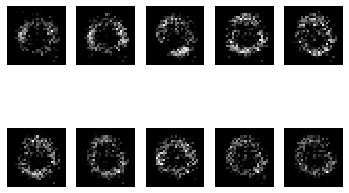

In [70]:
f, ax = plt.subplots(2,5)
for j in range(5):
    gen, c = net.generate(sess)
    ax[0,j].imshow(np.reshape(gen, (28, 28)),
                  interpolation="nearest",
                  cmap="gray")
    ax[0,j].axes.get_xaxis().set_visible(False)
    ax[0,j].axes.get_yaxis().set_visible(False)
    
    gen = net.generate(sess)
    ax[1,j].imshow(np.reshape(gen, (28, 28)),
                  interpolation="nearest",
                  cmap="gray")
    ax[1,j].axes.get_xaxis().set_visible(False)
    ax[1,j].axes.get_yaxis().set_visible(False)

plt.show()

## Latent Space Visualization I

In [ ]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mean = np.array([[xi, yi]])
        x_mean = vae.generate(sess, z_mean=z_mean)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper",
           interpolation="nearest",
           cmap="gray")
plt.tight_layout()
plt.show()

## GIF Animation of Latent Space During Training

In [ ]:
import os
from io import BytesIO
import PIL.Image
import scipy.misc
import scipy.io
from IPython.display import clear_output, Image, display

In [ ]:
# define model params
layers_encoder = [784, 400, 400]
layer_latent = 2
layers_decoder = [400, 400, 784]

# initialize model
vae = VAE(layers_encoder=layers_encoder, 
          layer_latent=layer_latent,
          layers_decoder=layers_decoder)

In [ ]:
# training details
batch_size = 100
display_iters = None
iters_per_image = np.logspace(0, 3, num=50).astype(int)

# image details
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)

# store processed images
dir_path = '/home/mattw/Desktop/test_movie'  
saving = 1

for epoch, iters in enumerate(iters_per_image):
    
    # output updates
    print('\rEpoch %03g of %03g - training for %05g iters' % 
          (epoch+1, iters_per_image.size, iters), end='')
    
    # train model
    vae.train_iters(sess, batch_size=batch_size,
                          training_iters=iters,
                          display_iters=display_iters)
    
    # create latent state representation
    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):
            z_mean = np.array([[xi, yi]])
            x_mean = vae.generate(sess, z_mean=z_mean)
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)
    
    # save output
    if saving:
        file_name = 'vae-mnist_epoch_%03i.jpg' % epoch
        file_path = '/'.join([dir_path, file_name])
        canvas = np.uint8(255*canvas)
        PIL.Image.fromarray(canvas).save(file_path, 'jpeg')


### to create a gif:
convert -delay 4x120 -loop 0 *.jpg animated.gif

take all jpgs in current directory and turn them into a gif that loops indefinitely, with a framerate of 120/4 = 30 fps

In [ ]:
%reload_ext watermark
%watermark -a "Matt Whiteway" -d -v -m -p numpy,tensorflow